In [1]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]

from scipy.sparse import load_npz, save_npz, vstack

In [2]:
features = load_npz('features_inga_dropped.npz')
features.shape

(842, 1676)

In [3]:
classes = np.load('classes_inga.npy')
classes.shape

(842, 71)

In [4]:
def plotDistribution(y):
    n_ones =  y.sum(axis=0)
    n_records =  y.shape[0]
    n_labels =  y.shape[1]
    plt.bar(np.arange(n_labels),n_ones)
    plt.ylim([0,n_records])
    plt.title('Number of \'1\'s in Each Label')
    plt.show()

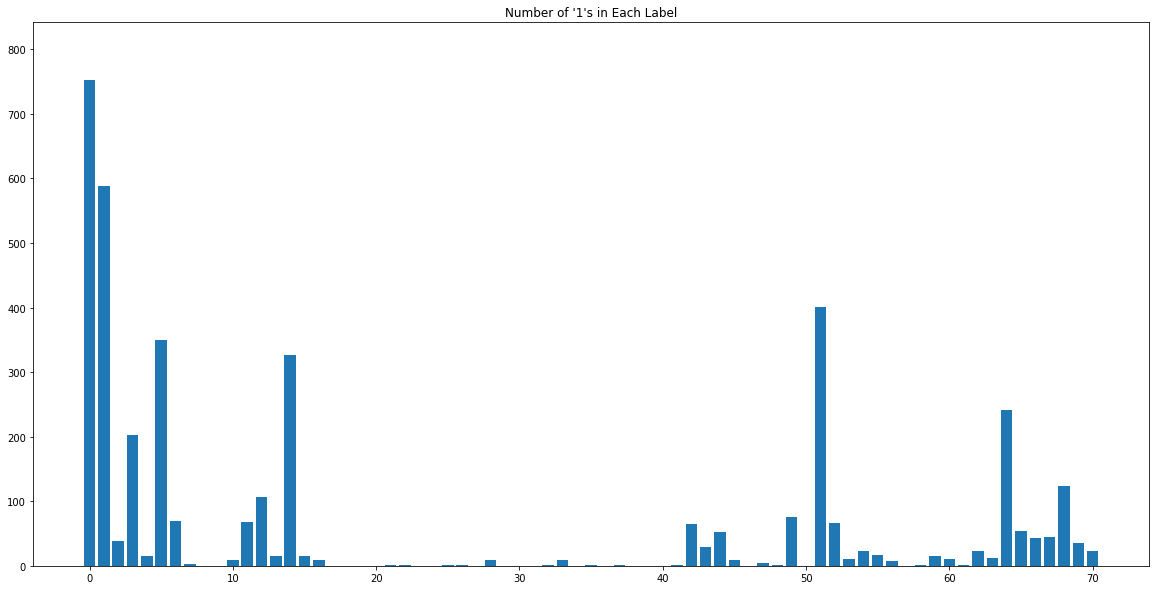

In [5]:
plotDistribution(classes)

In [6]:
def duplicateMinority(x, y):

    n = y.shape[0]
    n_pos = y.sum(axis=0)
    n_neg = n - n_pos

    minValue_pos = n_pos[n_pos != 0].min()
    minValue_neg = n_neg[n_neg != 0].min()

    new_x = x.copy()
    new_y = y.copy()
    
    if minValue_pos < minValue_neg:
        minValue = minValue_pos
        minIndex = np.where(n_pos == minValue)
        ind = np.full((n), False, dtype=bool)
        for i in minIndex[0]:
            ind = ind | (y[:,i] == 1)
        new_x = vstack([new_x, x[ind]])
        new_y = np.append(new_y, y[ind], axis=0)
    else:
        minValue = minValue_neg
        minIndex = np.where(n_neg == minValue)
        ind = np.full((n), False, dtype=bool)
        for i in minIndex[0]:
            ind = ind | (y[:,i] == 0)
        new_x = vstack([new_x, x[ind]])
        new_y = np.append(new_y, y[ind], axis=0)
            
    return new_x, new_y, ind.sum()

In [7]:
def duplicateMinorities(x, y, threshold=0.1, max_perc=0.5):
    
    new_x = x.copy()
    new_y = y.copy()
    i = 0
    
    while True:
        
        n = new_y.shape[0]
        n_pos = new_y.sum(axis=0)
        n_neg = n - n_pos

        minValue_pos = n_pos[n_pos != 0].min()
        minValue_neg = n_neg[n_neg != 0].min()

        ratio_pos = minValue_pos / n
        ratio_neg = minValue_neg / n
        
        if (ratio_pos > threshold and ratio_neg > threshold) or i/n >= max_perc:
            break;
        else:
            new_x, new_y, i_inc = duplicateMinority(new_x, new_y)
            i = i + i_inc
            print('{},{},{}'.format(ratio_pos, ratio_neg, i/n))
        
    return new_x, new_y

In [8]:
new_features, new_classes = duplicateMinorities(features, classes, max_perc=0.5)

0.0011876484560570072,0.10570071258907364,0.0059382422802850355
0.0023612750885478157,0.10861865407319952,0.024793388429752067
0.0034762456546929316,0.11587485515643106,0.027809965237543453
0.004618937644341801,0.11547344110854503,0.06466512702078522
0.0066815144766146995,0.1291759465478842,0.06904231625835189
0.008849557522123894,0.12831858407079647,0.13938053097345132
0.011363636363636364,0.15289256198347106,0.1415289256198347
0.012257405515832482,0.16138917262512767,0.1644535240040858
0.014955134596211365,0.1575274177467597,0.17547357926221335
0.015717092337917484,0.15520628683693516,0.30648330058939094
0.019064124783362217,0.1923743500866551,0.28942807625649913
0.02040816326530612,0.20578231292517007,0.34523809523809523
0.020032051282051284,0.1971153846153846,0.3453525641025641
0.021209740769835034,0.19560094265514533,0.35978004713275724
0.023076923076923078,0.19153846153846155,0.37538461538461537
0.02406015037593985,0.2,0.5593984962406015
0.025851197982345524,0.23833543505674654,0

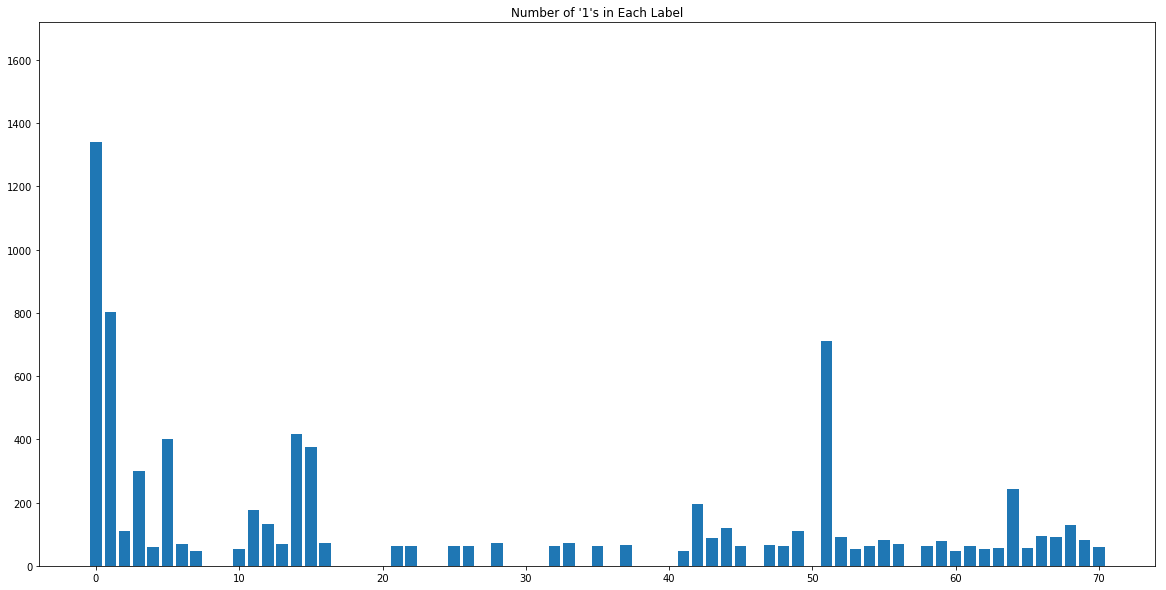

In [9]:
plotDistribution(new_classes)

In [10]:
save_npz('features_inga_duplicated', new_features)

In [12]:
np.save('classes_inga_duplicated', new_classes)